In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("iris.data",header=None )

In [5]:
col = ["sepalLength", "sepalWidth", "petalLength", "petalWidth", "classes"]
data.columns = col

In [6]:
sl = np.array(data.iloc[:,0])
sw = np.array(data.iloc[:,1])
pl = np.array(data.iloc[:,2])
pw = np.array(data.iloc[:,3])
label = np.array(data.iloc[:,4])

labelConvert = []
for _ in label:
    if _ == "Iris-setosa":   # 0 means setosa
        _ = 0
        labelConvert.append(_)
    elif _ == "Iris-versicolor":  # 1 means versicolor
        _ = 1
        labelConvert.append(_)
    else:                      # 2 means virginica
        _ = 2
        labelConvert.append(_)

labelConvert = np.array(labelConvert)
#labelConvert   # convert string to int 

In [7]:
# plt.scatter(sl,sw, c=label)
label.shape, sl.shape
name = ['setosa','versicolor','virginica']

In [8]:
data.iloc[data['sepalWidth'].argmax(),:]  #find row(instance) with maximum sepalWidth 

sepalLength            5.7
sepalWidth             4.4
petalLength            1.5
petalWidth             0.4
classes        Iris-setosa
Name: 15, dtype: object

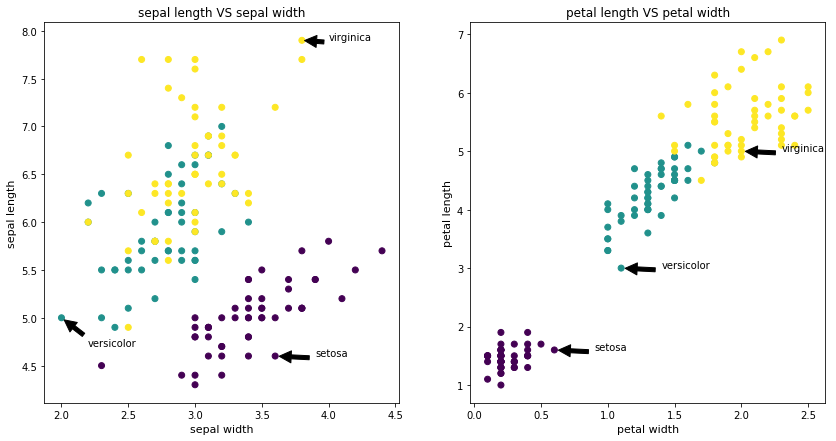

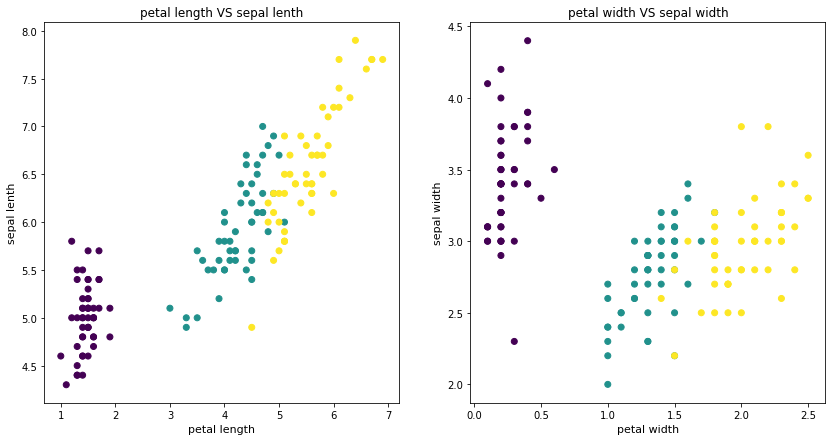

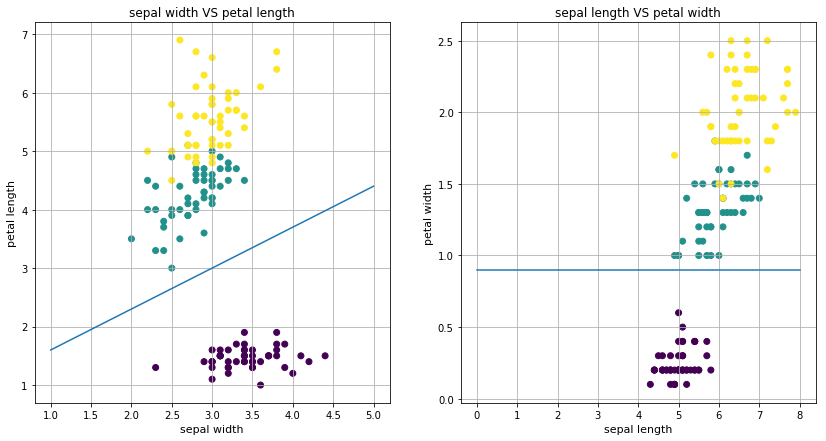

In [9]:
############
# MISSION 1
############
plt.figure(figsize=(14,7))
plt.subplot(121)

plt.scatter(sw, sl, c=labelConvert)
plt.ylabel("sepal length",fontsize=11)
plt.xlabel("sepal width", fontsize=11)
plt.title("sepal length VS sepal width")
plt.annotate('setosa',xy=(3.6,4.6),xytext=(3.9, 4.6), arrowprops=dict(facecolor='black',shrink=0.1))
plt.annotate('virginica',xy=(3.8,7.9),xytext=(4.0,7.9),arrowprops=dict(facecolor='black',shrink=0.1))
plt.annotate('versicolor',xy=(2.0,5.0),xytext=(2.2, 4.7), arrowprops=dict(facecolor='black',shrink=0.1))


plt.subplot(122)
plt.scatter(pw, pl, c=labelConvert)
plt.ylabel("petal length",fontsize=11)
plt.xlabel("petal width", fontsize=11)
plt.title("petal length VS petal width")
plt.annotate('setosa',xy=(0.6,1.6),xytext=(0.9, 1.6), arrowprops=dict(facecolor='black',shrink=0.1))
plt.annotate('virginica',xy=(2.0,5),xytext=(2.3,5),arrowprops=dict(facecolor='black',shrink=0.1))
plt.annotate('versicolor',xy=(1.1,3),xytext=(1.4, 3), arrowprops=dict(facecolor='black',shrink=0.1))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(pl, sl, c=labelConvert)
plt.xlabel("petal length",fontsize=11)
plt.ylabel("sepal lenth", fontsize=11)
plt.title("petal length VS sepal lenth")
plt.subplot(122)
plt.scatter(pw,sw, c=labelConvert)
plt.xlabel("petal width",fontsize=11)
plt.ylabel("sepal width", fontsize=11)
plt.title("petal width VS sepal width")

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(sw,pl, c=labelConvert)
plt.xlabel("sepal width",fontsize=11)
plt.ylabel("petal length", fontsize=11)
xtest = np.linspace(1,5, 10)
ytest = np.array([(7/10)*_ + 0.9 for _ in xtest])  # go through points (0,0.9) (3,3)
plt.plot(xtest, ytest)
plt.title("sepal width VS petal length")
plt.grid(True)

plt.subplot(122)
plt.scatter(sl,pw ,c=labelConvert)
plt.xlabel("sepal length",fontsize=11)
plt.ylabel("petal width", fontsize=11)
plt.title("sepal length VS petal width")
x1 = np.array([0,8])
y1 = np.array([0.9,0.9])
plt.plot(x1,y1)
plt.grid(True)

In [10]:
##############
# MISSION 2 find the weights, bias and test the hyperplane
##############

In [11]:
# weights (0, 7/10, -1,-1)
# bias    0.9
# below is the computiation of sgn(WX + b)

def yfunc(t):   # t is a np.ndarray or a list
    return 0*t[0] + (7/10)*t[1] + (-1)*t[2] + (-1)*t[3] + 0.9

def sgn(y):      
    if (y>0):
        return 1
    elif (y<0):
        return 0

In [12]:
# get all setosa
setosa = data.loc[data['classes']=='Iris-setosa']
setosaNP = np.array(setosa.iloc[:,0:4])

classSetosa = []
for _ in setosaNP:
    classSetosa.append(sgn(yfunc(_)))
# this 
np.array(classSetosa)  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [13]:
# get all non-setosa
non_setosa = data.loc[data['classes']!='Iris-setosa']
non_setosaNP = np.array(non_setosa.iloc[:,0:4])

classNon_Setosa = []
for _ in non_setosaNP:
    classNon_Setosa.append(sgn(yfunc(_)))
np.array(classNon_Setosa)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])